# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 2
### Due: 11:59 pm EST, Saturday, Oct 30, 2021

### Problem 1 (20 points)

**(Use no more than a word, phrase or a sentence to answer these questions)**

1.	True or False: When building a classification model, our goal is to minimize the test error.
2.	Name two reasons to build a classification model.
3.	True or False:  The decision tree built recursively by choosing the best split at each node can be shown to be optimal.
4.	Given a categorical attribute that can take n different values, how many binary splits are possible ? Does the answer depending on whether it is ordinal vs nominal ?
5.	A numeric attribute can have infinitely many values, but let us say it has n unique values in the training data. How many binary splits do we need to consider in practice ?
6.	Under what condition is the impurity of a node the maximum (assuming an N-class problem) ?
7.	True or False: The entropy of the child nodes of a given node is the sum of their entropy.
8.	Why do we use Gain Ratio rather than Gain to decide on the best split of a decision tree node ?
9.	Name two generic strategies to prevent a decision tree from overfitting the training data.
10.	The decision boundaries learned by decision trees are constrained to be ___________ in shape.
11.	Name two advantages of using k-fold cross-validation over holdout for model evaluation.
12.	How do model hyperparameters differ from model parameters ? And how are they optimized ?
13.	On my summer internship, I trained an OCR (optical character recognition) model using a large training set and evaluated its performance on a test dataset of 1000 samples of handwritten characters. The classifier was 99.8% accurate; it only made 2 errors on the test set. I visually inspected the misclassified test samples and found that by adjusting the image binarization settings, I could get a 100% accuracy on the test set. The next morning, I reported my results to my supervisor who happened to be a data scientist. She was very _________. (select “pleased” or “unhappy”, and explain why). 
14.	I would like to report the accuracy of a classifier using a confidence interval. 
True or False: In order to have greater confidence in its reported accuracy, I should test it on a larger test set, or use a narrower confidence interval.
15.	We find that using a certain model, the test error is large. 
True or False: This clearly suggests that the model is overfitting the training data.
16.	Name two interconnected factors that contribute to model overfitting.
17.	True or false: Model selection refers to the problem of selecting the most appropriate classification technique to apply to the problem.
18.	Name two generic approaches for model selection.
19.	Explain in brief, the difference between Pessimistic and Optimistic error estimates for a decision tree.
20.	Name one advantage and one disadvantage of post-pruning vs pre-pruning a decision tree.



### Solution

1. True


2. a. classify a large number of records at the same time <br>
   b. classify records with a higher accuraccy than by human overview


3. False, it is not always ideal to select the best splits at every node in a decision tree as it can lead to heavy overfitting of the data.


4. n-1 splits, answer does not change


5. n +1 splits


6. The impurity of a Node is maximum when there is equal number of each of possible classifications in that node


7. False


8. Gain is heavily biased towards unique identifiers in the data such as ID but it is not a helpful identifier in most trees, Gain ratio takes into account biases the tree against attributes with a large number of distinct values to make more prefferable splits


9. pre-pruning and post-pruning


10. rectilinear


11.  1 - You dont need as much data to get a solid model as compared to the holdout method since we reuse the data
     2 - Gives a more robust estimate of the generalization error rate 


12. Model parameters are esitmated from data while hyperparameters are set manually and used to estimate model parameters
    Hyperparameters are optimized using a gridsearch or perimeter sweep method


13. Unhappy, it generally means that the model is too rigid and will not be able to adapt well to new data


14. True


15. False


16. small dataset with a large number of hyperparameters in the model


17. True


18. Incorporating Model Complexity and Estimating Statistical Bounds


19. pessimistic error  assumes the generalization error rate to be worse than the training error rate
    optimistic error assumes the training error rate as an estimate for the generalization error rate 
    

20. Advantage of post-pruning vs pre-pruning - post-pruning garuntees a more optimal decision tree
    Disadvantage of post-pruning vs pre-pruning - post-pruning is slower than pre-pruning






### Problem 2 (20 points)

Consider the training examples shown in the table below for a binary classification problem.


| Cust ID | Gender | Car Type | Shirt Size | Income | Class |
|---|---|---|---|---|---|
| 1 | M | Family | Small | 70 | C0 |
| 2 | M | Sports | Medium | 110 | C0 |
| 3 | M | Sports | Medium | 80 | C0 |
| 4 | M | Sports | Large | 80 | C0 |
| 5 | M | Sports | Extra Large | 200 | C0 |
| 6 | M | Sports | Extra Large | 150 | C0 |
| 7 | F | Sports | Small | 130 | C0 |
| 8 | F | Sports | Small | 90 | C0 |
| 9 | F | Sports | Medium | 100 | C0 |
| 10 | F | Luxury | Large | 120 | C0 |
| 11 | M | Family | Large | 150 | C1 |
| 12 | M | Family | Extra Large | 140 | C1 |
| 13 | M | Family | Medium | 90 | C1 |
| 14 | M | Luxury | Extra Large | 200 | C1 |
| 15 | F | Luxury | Small | 190 | C1 |
| 16 | F | Luxury | Small | 130 | C1 |
| 17 | F | Luxury | Medium | 150 | C1 |
| 18 | F | Luxury | Medium | 180 | C1 |
| 19 | F | Luxury | Medium | 80 | C1 |
| 20 | F | Luxury | Large | 190 | C1 |



**2.1.**	Compute all three Impurity Measures (Gini index, Entropy and Classification Error Rate) for the overall collection of training examples.

**2.2.**	We are considering splitting the root node based on each of the following attributes:  Gender, Car Type, Shirt Size and Income.

For each categorical attribute, we would like to explore just one multi-way split with as many children as there are values.
For numeric attributes, we would like to explore all possible binary splits.

For each split above, compute all three Impurity Measures after the split. 

For each split above, compute the Gain based on each Impurity Measure.

**2.3.**	Which split (across all attributes) is best according to the Gain based on each impurity measure ?

**2.4.**	What is the training error rate of the simple tree induced by this best split ?



### Solution

#### Solution 2.1

Equal number of all classes - max values for Gini index, Entropy and Classification Error rate. <br>
Gini index = 0.5 <br>
Entropy = 1 <br>
Classification error rate = 0.5 <br>

#### Solution 2.2

In [2]:
import pandas as pd
import math

df = pd.read_csv('customer.csv')

def gini(vals):
    c0 = (len(vals[vals['Class'] == 'C0'])*1.0)/len(vals)
    c1 = (len(vals[vals['Class'] == 'C1'])*1.0)/len(vals)
    out = 1 - c0**2 - c1**2
    print("Gini : " + str(out))
    if(c0 == 0):
        entropy = -1.0 * c1*math.log(c1,2)
    elif(c1 == 0):
        entropy = -1.0 * c0*math.log(c0,2)
    else:
        entropy = -1.0 * (c1*math.log(c1,2) + c0*math.log(c0,2))
    print("Entropy : " + str(entropy))
    error = 1 - max(c0, c1)
    print("Classification error rate : " + str(error))
    print()
    return entropy*len(vals)/20

print("Gender Split")
x = df['Gender'].unique()
gain = 1

for val in x:
    print(val)
    y = df[df['Gender'] == val]
    gain -= gini(y)
    
print("The Final Gain for the split is " + str(gain))
print()
gain = 1
print("Car Split")
x = df['Car Type'].unique()
for val in x:
    print(val)
    y = df[df['Car Type'] == val]
    gain -= gini(y)
print("The Final Gain for the split is " + str(gain))
print()
gain = 1
print("Shirt Split")
x = df['Shirt Size'].unique()
for val in x:
    print(val)
    y = df[df['Shirt Size'] == val]
    gain -= gini(y)
print("The Final Gain for the split is " + str(gain))
print()
print("Income split")

x = df['Income'].unique()
x.sort()
x = x[:-1]

for val in x:
    print("Splitting on " + str(val))
    gain = 1
    print("<= " + str(val))
    y = df[df['Income'] <= val]
    gain -= gini(y)
    print("> " + str(val))
    z = df[df['Income'] > val]
    gain -= gini(z)
    print("The Final Gain for this split is " + str(gain))
    
## Note the due to python math the gain for the last split is -2 * 10^-17 while in actuallity it is 0

Gender Split
M
Gini : 0.48
Entropy : 0.9709505944546686
Classification error rate : 0.4

F
Gini : 0.48
Entropy : 0.9709505944546686
Classification error rate : 0.4

The Final Gain for the split is 0.02904940554533142

Car Split
Family
Gini : 0.375
Entropy : 0.8112781244591328
Classification error rate : 0.25

Sports
Gini : 0.0
Entropy : -0.0
Classification error rate : 0.0

Luxury
Gini : 0.21875
Entropy : 0.5435644431995964
Classification error rate : 0.125

The Final Gain for the split is 0.6203185978283349

Shirt Split
Small
Gini : 0.48
Entropy : 0.9709505944546686
Classification error rate : 0.4

Medium
Gini : 0.489795918367347
Entropy : 0.9852281360342516
Classification error rate : 0.4285714285714286

Large
Gini : 0.5
Entropy : 1.0
Classification error rate : 0.5

Extra Large
Gini : 0.5
Entropy : 1.0
Classification error rate : 0.5

The Final Gain for the split is 0.012432503774344683

Income split
Splitting on 70
<= 70
Gini : 0.0
Entropy : -0.0
Classification error rate : 0.0

> 

#### Solution 2.3

The car split is the best split according to the gains calculated using entropy

#### Solution 2.4

0.25 + 0 + 0.125
the training error rate is 0.325

### Problem 3 (25 points)

**(Use no more than a word, phrase or a sentence to answer these questions)**

1.	Name the primary difference between a generative and discriminative classifier.
2.	True or False: A decision tree is a non-linear classifier.
3.	You are asked to design a k-NN classifier. How would you optimize the value of k ?
4.	Your colleague has implemented a k-NN classification function in Python to classify email messages. You would like to use the code on your dataset to classify hospital patients. What may you need to change ?
5.	Why is the nearest neighbor classifier called a “lazy learner” ?
6.	Naïve Bayes is a generative classifier. Why ?
7.	State the major assumption Naïve Bayes makes about the input attributes.
8.	True or False: Bagging involves combining the decisions of classifiers build on small subsets of training data called “bootstrap samples” that are selected at random without replacement.
9.	True or False: Every tree in a Random Forest uses the full set of the available attributes on a random subset of training data samples.
10.	Can the generalization error of Random Forest be estimated without an explicit test set ?
11.	True or False: Artificial Neural Networks closely model the processing of information in mammalian brains.
12.	What is meant by a “fully connected layer” in an ANN ?
13.	True or False:  ANNs are able to model highly non-linear functions from input features to output classes primarily because they distribute computation over a large number of artificial neurons.
14.	What is the role of softmax activation in ANNs ?
15.	You have been asked to design an ANN for a classification problem. Assuming the input has N numeric attributes, how many neurons should you have in the input layer ? And in the output layer ?
16.	What is meant by “one-hot” encoding of a categorical value ?
17.	Name the algorithm used for training an ANN (which uses the aggregate loss on a batch of training samples to update all of the weights).
18.	How can we ensure that ANN training converges to the global minimum in the loss surface ?
19.	Name two common types of Deep Networks.
20. Name one reason why Deep Networks may not be a good choice for given classification problem.
21. What is Gradient Descent ?
22.	True or False: Logistic Regression constructs decision boundaries in the shape of a sigmoid curve.
23. True or False: Redundant attributes can post a problem for Logistic Regression.
24. State the primary assumption made by Logistic Regression and compare it to Naive Bayes.
25.	Name one reason Logistic Regression is popular despite not being as powerful as other methods.

### Solution

1. A Discriminative model, models the decision boundary between the classes while a Generative Model models the actual distribution of each class. (one is a line separating classes the other is an area that shows where a class should be)


2. True


3. sqrt(n)


4. Realistically speaking the proximity measures will need to be changed to better match the new implementation but otherwise we can use the general structure of the function and adapt it to our needs.


5. knn is a lazy learner because it doesn't learn a discriminative function from the training data but memorizes the training dataset and uses that for its predictions


6. A generative model explicitly models the joint probability distribution p(x,y) and then uses the Bayes rule to compute p(y|x). Since Naive Bayes does this it is a generative model


7. Naive Bayes makes an assumption of conditional independence for every feature


8. False, bootstrap samples are made with replacement


9. False, the full set of available attributes is not used


10. yes (out-of-bag error)


11. True


12. Fully Connected layers in a neural networks are those layers where all the inputs from one layer are connected to every activation unit of the next layer. (all hidden layers are fully connected)


13. true


14. the softmax function converts raw output scores into probabilities by exponentiating and normalizing. (it gives probablities for outputs)


15. N input neurons (same as number of attributes). The number of output neurons depends on the number of classifications that we have.


16. In 'one-hot' encoding, you convert each categorical value of a categorical column into a new attribute column which only takes binary values. It is a method to convert data into a form that is easier to use in algorithms.


17. Mini Batch Gradient Descent


18. We can impliment the gradient descent algorithm to ensure that we arrive at a global minimum


19. Convolutional Neural Networks and Recurrent Neural Networks


20. Deep Networks need large ammounts of data before they start outperforming other methods. If we have small ammounts of data on hand, they would not be a good choice for a classification problem.


21. It is an algorithm follows the path of steepest descent into a local minimum on a given surface.


22. False, the boundraies made are liniear(the probablity function used to make the boundary is a sigmoid)


23. Highly correlated factors and outliers can confuse the learning process thus redundant attributes will be an issue


24. Primary assumption of Logistic Regression is that the result is binary (can only be one of two values), Naive Bayes on the other had does not care about the number of classifications.


25. it is simple and effecient




## Problem 4 (15 points)

Assuming the training dataset in Problem 2, and ignoring the Cust ID attribute, classify the following data points as being class C0 or C1 using the Naive Bayes classifier:

(Gender = M, Car Type = Family, Shirt Size = Small, Income = 110 )

(Gender = F, Car Type = Luxury, Shirt Size = Medium, Income = 90)

(Gender = M, Car Type = Sports, Shirt Size = Extra Large, Income = 140)

Assume that income is quantized using five intervals (< 90, 91-120, 121-150, 151-180, > 180) for the purposes of applying Naive Bayes.

Show your work and the class probabilities computed by Naive Bayes.

**Extra credit (5 points):** How does the above change if you were to model income using a Normal Distribution instead of using quantization ?


### Solution

In [65]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('customer.csv')

number = LabelEncoder()
df['Gender'] = number.fit_transform(df['Gender'])
df['Car Type'] = number.fit_transform(df['Car Type'])
df['Shirt Size'] = number.fit_transform(df['Shirt Size'])
df['Class'] = number.fit_transform(df['Class'])

df['Income_quant'] = pd.cut(df.Income,bins=[0, 90, 120, 150, 180, 900],labels=[0, 1, 2, 3, 4])
features = ['Gender', 'Car Type', 'Shirt Size', 'Income_quant']
target = ['Class']

model = CategoricalNB()
model.fit(df[features], df[target])

## M = 1 F = 0
## Family = 0 Sports = 2 Luxury = 1
## small = 3, Medium = 2, Large = 1, extra large = 0
## 
print("(Gender = M, Car Type = Family, Shirt Size = Small, Income = 110 )")
arr = [1, 0, 3, 1]
arr = np.array(arr).reshape(1, -1)
pred = model.predict(arr)
if pred == [1]:
    print("Prediction is C1")
else:
    print("Prediction is C0")
    
    
print("(Gender = F, Car Type = Luxury, Shirt Size = Medium, Income = 90)")
arr = [0, 1, 2, 0]
arr = np.array(arr).reshape(1, -1)
pred = model.predict(arr)
if pred == [1]:
    print("Prediction is C1")
else:
    print("Prediction is C0")
    
    
print("(Gender = M, Car Type = Sports, Shirt Size = Extra Large, Income = 140)")
arr = [1, 2, 0, 2]
arr = np.array(arr).reshape(1, -1)
pred = model.predict(arr)
if pred == [1]:
    print("Prediction is C1")
else:
    print("Prediction is C0")
    
print()
print()
print("Using normal distribution instead of quantization")
features = ['Gender', 'Car Type', 'Shirt Size', 'Income']
model1 = GaussianNB()
model1.fit(df[features], df[target])

print("(Gender = M, Car Type = Family, Shirt Size = Small, Income = 110 )")
arr = [1, 0, 3, 110]
arr = np.array(arr).reshape(1, -1)
pred = model1.predict(arr)
if pred == [1]:
    print("Prediction is C1")
else:
    print("Prediction is C0")
    
    
print("(Gender = F, Car Type = Luxury, Shirt Size = Medium, Income = 90)")
arr = [0, 1, 2, 90]
arr = np.array(arr).reshape(1, -1)
pred = model1.predict(arr)
if pred == [1]:
    print("Prediction is C1")
else:
    print("Prediction is C0")
    
    
print("(Gender = M, Car Type = Sports, Shirt Size = Extra Large, Income = 140)")
arr = [1, 2, 0, 140]
arr = np.array(arr).reshape(1, -1)
pred = model1.predict(arr)
if pred == [1]:
    print("Prediction is C1")
else:
    print("Prediction is C0")
    
print("when modeling a normal distribution the final predictions changes")

(Gender = M, Car Type = Family, Shirt Size = Small, Income = 110 )
Prediction is C0
(Gender = F, Car Type = Luxury, Shirt Size = Medium, Income = 90)
Prediction is C1
(Gender = M, Car Type = Sports, Shirt Size = Extra Large, Income = 140)
Prediction is C0


Using normal distribution instead of quantization
(Gender = M, Car Type = Family, Shirt Size = Small, Income = 110 )
Prediction is C1
(Gender = F, Car Type = Luxury, Shirt Size = Medium, Income = 90)
Prediction is C1
(Gender = M, Car Type = Sports, Shirt Size = Extra Large, Income = 140)
Prediction is C0
even with modeling a normal distribution the final predictions remain the same


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\ut

### Problem 5 (10 points)

Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.

**5.1.** Design and implement as a Python function, what you feel is a good proximity measure between two data samples (diamonds) in the Diamonds dataset. Explain the rationale for your design.

**5.2.** Implement a function that takes the index of a data sample in the dataset as input, and returns the indices of its k nearest neighbors using the proximity measure you defined, where k is a parameter.

In [4]:
df = pd.read_csv('diamonds.csv')

cut_code = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_code = {'D':6, 'E':5, 'F':4, 'G':3, 'H':2, 'I':1, 'J':0}
clarity_code = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':6, 'VVS1':7, 'IF':8}

df['cut'] = df['cut'].map(cut_code)
df['color'] = df['color'].map(color_code)
df['clarity'] = df['clarity'].map(clarity_code)
df = df.iloc[: , 1:]

df_norm = (df-df.min())/(df.max()-df.min())

## After converting all the categorical data into numeric values (while maintain order) scaled all the values between 0 and 1
## now im calualing the distance beween each values and summing them up to get a general distance as a measure of proximity
## the smaller the distance the closer the values.
print("Scaled values in dataframe")

def calculate_dist(x , y):
    return abs((x['carat'] - y['carat'].values[0])) + abs((x['cut'] - y['cut'].values[0]))+ abs((x['color'] - y['color'].values[0]))  + abs((x['clarity'] - y['clarity'].values[0])) +abs((x['depth'] - y['depth'].values[0])) +abs((x['table'] - y['table'].values[0])) +abs((x['price'] - y['price'].values[0])) +abs((x['x'] - y['x'].values[0])) +abs((x['y'] - y['y'].values[0])) +abs((x['z'] - y['z'].values[0]))

#Diamonds has 53k rows might take a while
#returns the k closest values (due to calculation it returns the provided column as well hence a total of k+1 index are 
# initially returned then the first one is dropped)
def nearest_k(index, k):
    base_row = df_norm.iloc[[index]]
    df_norm['distance'] = df_norm.apply(lambda row : calculate_dist(row, base_row), axis = 1)
    temp = df_norm.nsmallest(k+1, 'distance')
    out = temp.index.values
    out = out[1:]
    return(out)

x = nearest_k(1 , 5)
print(x)
print('Done')

Scaled values in dataframe
[46309 29265 28603 46626 28652]
Done


### Problem 6 (20 points)

Download the Indian Liver Patient Dataset from https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset). This dataset contains data about two types of patients - those with, and without liver disease. All but one attribute are continuous.


**6.1.**	Exploratory analysis and Preprocessing

a.	Compute the distribution of the classes

b.	Check if any of the data samples have missing values, and if so, replace them with appropriate imputed values

c.	Replace the categorical attribute with multiple binary attributes using one-hot encoding.

d. Plot the correlation between all pairs of attributes (including the class attribute)

e.	Divide the data randomly into a training, validation dataset and a test dataset in a 70:10:20 ratio.

**6.2.**	Decision Tree Classifier

a.	Train a Decision Tree classifier on the training data using Gini Index as the impurity measure.

b.	Compute the classification accuracy on the training and validation data.

c.	Try alternative values for any one hyperparameter of your choice and see if the validation accuracy improves. 

d. Compute the test accuracy for the best setting of the hyperparameter and plot the confusion matrix.

**6.3.**	K-NN

a.	Use k-NN with Euclidean distance and k = 5.

b.	Compute the classification accuracy on the training, validation and test data.

c.	Try alternative values of k (such as 1, 3, 7, 9) and see if the validation accuracy improves. 

d. Compute the test accuracy for the best setting of k and plot the confusion matrix.

e.	Repeat steps b, c and d after normalizing the input features


**6.4.**	Cross-validation

a.	Use 5-fold cross-validation to train and evaluate the decision tree and k-NN classifiers on the entire dataset, using 4 folds for training and one for testing. Ideally we would use nested validation to select hyper parameters, but you can use the hyper-parameter values selected earlier.


**6.5.**	Other classifiers

a.	Use cross validation to compare the results of any one of Random Forest, Logistic Regression, or ANN for this problem and with those of Decision Tree and k-NN.

**Extra credit (5 points):** Attempt additional exploratory analysis and preprocessing to improve the validation accuracy.


**Extra credit (5 points):** Instead of a fixed validation set, split the dataset into a training and test set in a 80:20 ratio and use the GridSearchCV function on the training set to look for the best hyperpamater values for Decision tree and k-NN classification. Compute the accuracy using the best performing hyperparameters using 5-fold cross-validation on the entire dataset.





### Solution

#### Solution 6.1

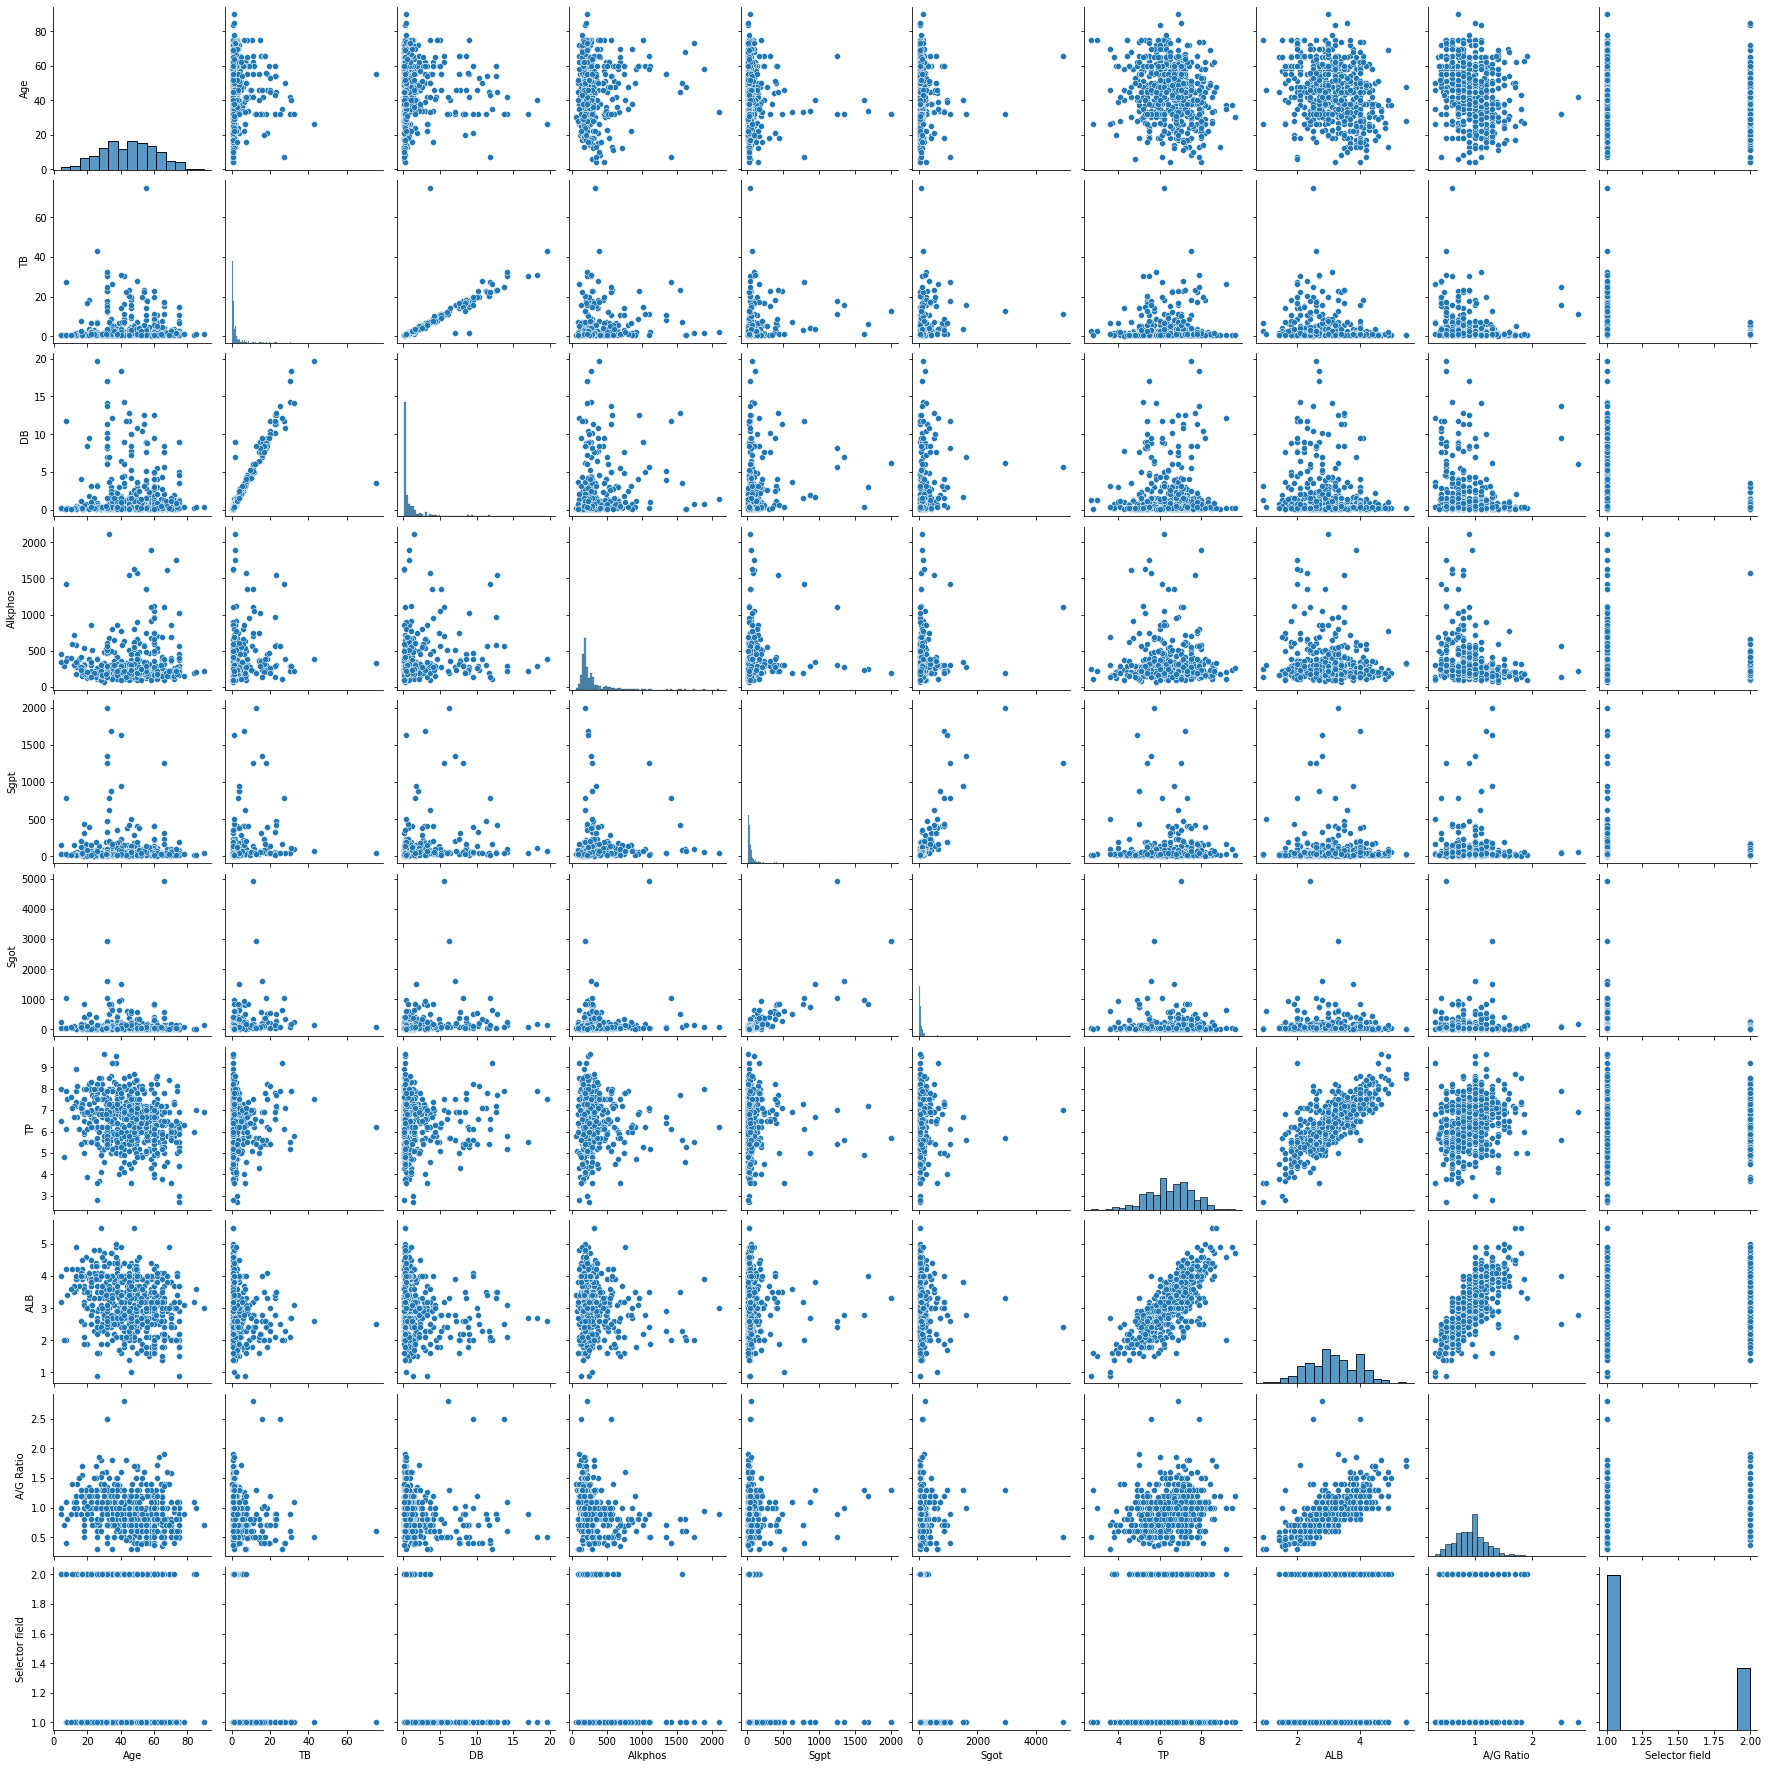

In [69]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
header_list = ["Age", "Gender", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio", "Selector field"]
df = pd.read_csv('liver.csv', names = header_list)
sns.pairplot(df)

In [70]:
#Shows us that A/G Ratio has some missing values (4 missing values to be exact)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             583 non-null    int64  
 1   Gender          583 non-null    object 
 2   TB              583 non-null    float64
 3   DB              583 non-null    float64
 4   Alkphos         583 non-null    int64  
 5   Sgpt            583 non-null    int64  
 6   Sgot            583 non-null    int64  
 7   TP              583 non-null    float64
 8   ALB             583 non-null    float64
 9   A/G Ratio       579 non-null    float64
 10  Selector field  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [71]:
#Replacing the missing values with the mean of the existing values
df['A/G Ratio'].fillna(value=df['A/G Ratio'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             583 non-null    int64  
 1   Gender          583 non-null    object 
 2   TB              583 non-null    float64
 3   DB              583 non-null    float64
 4   Alkphos         583 non-null    int64  
 5   Sgpt            583 non-null    int64  
 6   Sgot            583 non-null    int64  
 7   TP              583 non-null    float64
 8   ALB             583 non-null    float64
 9   A/G Ratio       583 non-null    float64
 10  Selector field  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [72]:
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)
df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector field,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


<AxesSubplot:>

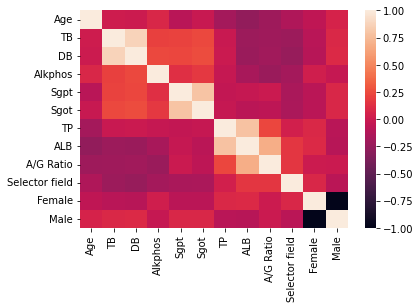

In [73]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [74]:
import numpy as np
train, validate, test = np.split(df.sample(frac=1, random_state=100), [int(.7*len(df)), int(.8*len(df))])

#### Solution 6.2

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
X = train[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = train[["Selector field"]]

clf = DecisionTreeClassifier()
clf = clf.fit(X,Y)

X_validate = validate[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_validate = validate[["Selector field"]]

Y_pred = clf.predict(X_validate)
train_pred = clf.predict(X)

print("Accuracy validate :", metrics.accuracy_score(Y_validate, Y_pred))
print("Accuracy train :", metrics.accuracy_score(Y, train_pred))
## Train Accuracy is 1, it is overfitted will look at tweaking hyper parameters in next cell

Accuracy validate : 0.7586206896551724
Accuracy train : 1.0


Accuracy validate : 0.7586206896551724
Accuracy train : 0.8774509803921569
Accuracy test : 0.6153846153846154
Confusion matrix, without normalization
[[62 20]
 [25 10]]
Normalized confusion matrix
[[0.75609756 0.24390244]
 [0.71428571 0.28571429]]


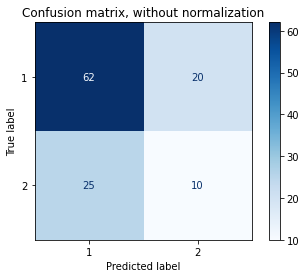

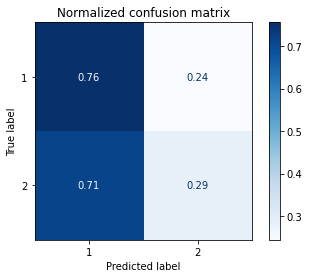

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
clf = DecisionTreeClassifier(max_depth=11, min_samples_leaf=3)
clf = clf.fit(X,Y)

Y_pred = clf.predict(X_validate)
train_pred = clf.predict(X)

X_test = test[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_test = test[["Selector field"]]

test_pred = clf.predict(X_test)

print("Accuracy validate :", metrics.accuracy_score(Y_validate, Y_pred))
print("Accuracy train :", metrics.accuracy_score(Y, train_pred))
print("Accuracy test :", metrics.accuracy_score(Y_test, test_pred))



titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        display_labels=[1,2],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Solution 6.3

In [50]:
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

X = train[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = train[["Selector field"]]

X_validate = validate[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_validate = validate[["Selector field"]]

X_test = test[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_test = test[["Selector field"]]

knn.fit(X, Y)
train_pred = knn.predict(X)
validate_pred = knn.predict(X_validate)
test_pred = knn.predict(X_test)

print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print("Accuracy train :", metrics.accuracy_score(Y, train_pred))
print("Accuracy test :", metrics.accuracy_score(Y_test, test_pred))

Accuracy validate : 0.603448275862069
Accuracy train : 0.7892156862745098
Accuracy test : 0.7008547008547008


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [52]:
print("TRYING DIFFERERNT K FOR VALIDATION")
print("K = 1")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, Y)
validate_pred = knn.predict(X_validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

print("K = 3")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
validate_pred = knn.predict(X_validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

print("K = 7")
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, Y)
validate_pred = knn.predict(X_validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

print("K = 9")
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X, Y)
validate_pred = knn.predict(X_validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

#7 and 9 had the same accuracy going with 7 for test

TRYING DIFFERERNT K FOR VALIDATION
K = 1
Accuracy validate : 0.6724137931034483

K = 3
Accuracy validate : 0.5862068965517241

K = 7
Accuracy validate : 0.6206896551724138

K = 9
Accuracy validate : 0.6206896551724138



c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

Confusion matrix, without normalization
[[69 13]
 [23 12]]
Normalized confusion matrix
[[0.84146341 0.15853659]
 [0.65714286 0.34285714]]


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


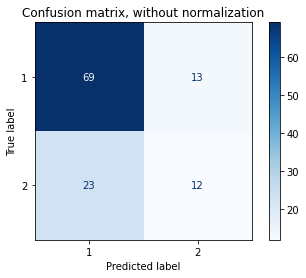

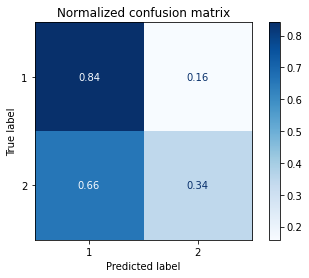

In [54]:
#####
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, Y)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        Y_test,
        display_labels=[1,2],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [61]:
### Normalizing all the values now
X_train = train[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_train = train[["Selector field"]]

norm_X_train =(X - X.min())/(X.max()-X.min())

X_validate = validate[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_validate = validate[["Selector field"]]

norm_X_Validate =(X_validate - X_validate.min())/(X_validate.max()-X_validate.min())

X_test = test[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y_test = test[["Selector field"]]

norm_X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(norm_X_train, Y_train)

train_pred = knn.predict(norm_X_train)
validate_pred = knn.predict(norm_X_Validate)
test_pred = knn.predict(norm_X_test)

print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print("Accuracy train :", metrics.accuracy_score(Y, train_pred))
print("Accuracy test :", metrics.accuracy_score(Y_test, test_pred))

Accuracy validate : 0.6896551724137931
Accuracy train : 0.7720588235294118
Accuracy test : 0.6068376068376068


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [66]:
print("TRYING DIFFERERNT K FOR VALIDATION")
print("K = 1")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(norm_X_train, Y_train)
validate_pred = knn.predict(norm_X_Validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

print("K = 3")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(norm_X_train, Y_train)
validate_pred = knn.predict(norm_X_Validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

print("K = 7")
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(norm_X_train, Y_train)
validate_pred = knn.predict(norm_X_Validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

print("K = 9")
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(norm_X_train, Y_train)
validate_pred = knn.predict(norm_X_Validate)
print("Accuracy validate :", metrics.accuracy_score(Y_validate, validate_pred))
print()

TRYING DIFFERERNT K FOR VALIDATION
K = 1
Accuracy validate : 0.6551724137931034

K = 3
Accuracy validate : 0.7068965517241379

K = 7
Accuracy validate : 0.6896551724137931

K = 9
Accuracy validate : 0.6896551724137931



c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

Confusion matrix, without normalization
[[64 18]
 [23 12]]
Normalized confusion matrix
[[0.7804878  0.2195122 ]
 [0.65714286 0.34285714]]


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


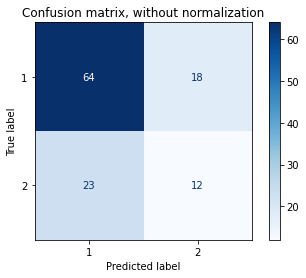

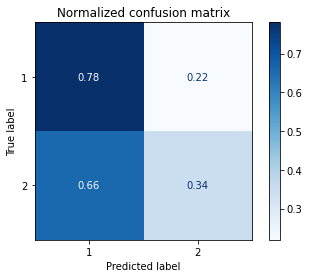

In [68]:
## K = 3 shows best results in this case
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(norm_X_train, Y_train)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        norm_X_test,
        Y_test,
        display_labels=[1,2],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Solution 6.4

In [88]:
## 5-Fold cross validation for tree
from sklearn.model_selection import cross_val_score
X = df[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = df[["Selector field"]]

norm_X =(X - X.min())/(X.max()-X.min())

depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=norm_X, y=Y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))

m1, m2 = 0 , 0   
for x in depth:
    if x[1] > m1:
        m1 = x[1]
        m2 = x[0]
print("Best Depth is " , m2)
print("With mean accuracy of ", m1)

Best Depth is  5
With mean accuracy of  0.6912761567933982


In [89]:
## 5-Fold cross validation for knn
X = df[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = df[["Selector field"]]

norm_X =(X - X.min())/(X.max()-X.min())

depth = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=knn, X=norm_X, y=Y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))

m1, m2 = 0 , 0   
for x in depth:
    if x[1] > m1:
        m1 = x[1]
        m2 = x[0]
print("Best Knn is " , m2)
print("With mean accuracy of ", m1)

Best Knn is  8
With mean accuracy of  0.6878720895962275


#### Solution 6.5

In [90]:
## Trying out random forest
from sklearn.ensemble import RandomForestClassifier
X = df[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = df[["Selector field"]]

norm_X =(X - X.min())/(X.max()-X.min())

depth = []
for i in range(2,20):
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=rfc, X=norm_X, y=Y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))

m1, m2 = 0 , 0   
for x in depth:
    if x[1] > m1:
        m1 = x[1]
        m2 = x[0]
print("Best Rfc depth is " , m2)
print("With mean accuracy of ", m1)

Best Rfc depth is  8
With mean accuracy of  0.7168582375478928


In [ ]:
#Random forest with depth 8 has best accuracy in this case (using k-fold cross validation)

Attempting exploratory analysis to make better predictions


<AxesSubplot:>

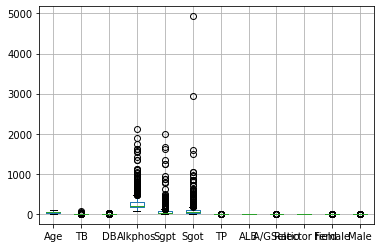

In [105]:
header_list = ["Age", "Gender", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio", "Selector field"]
df = pd.read_csv('liver.csv', names = header_list)
df['A/G Ratio'].fillna(value=df['A/G Ratio'].mean(), inplace=True)
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)
df.boxplot()
## WE can see that there are a few outliers that might be causing some issues
## Especially in Sgot, Sgpt and Alkphos
## for those columns we can drop top 1% for Sgot

<AxesSubplot:>

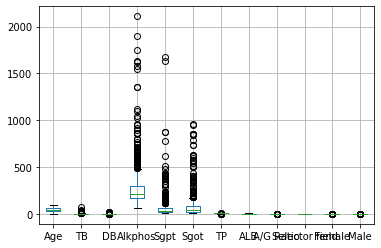

In [106]:
df = df[df['Sgot'] < np.percentile(df['Sgot'],99)]
#df = df[df['Alkphos'] < np.percentile(df['Alkphos'],95)]

df.boxplot()

In [108]:
X = df[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = df[["Selector field"]]

norm_X =(X - X.min())/(X.max()-X.min())

depth = []
for i in range(2,20):
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=rfc, X=norm_X, y=Y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))

m1, m2 = 0 , 0   
for x in depth:
    if x[1] > m1:
        m1 = x[1]
        m2 = x[0]
print("Best Rfc depth is " , m2)
print("With mean accuracy of ", m1)


depth = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=knn, X=norm_X, y=Y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))

m1, m2 = 0 , 0   
for x in depth:
    if x[1] > m1:
        m1 = x[1]
        m2 = x[0]
print("Best Knn is " , m2)
print("With mean accuracy of ", m1)


depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=norm_X, y=Y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))

m1, m2 = 0 , 0   
for x in depth:
    if x[1] > m1:
        m1 = x[1]
        m2 = x[0]
print("Best Depth for DecisionTreeClassifier is " , m2)
print("With mean accuracy of ", m1)

Best Rfc depth is  2
With mean accuracy of  0.7105847076461769
Best Knn is  8
With mean accuracy of  0.679400299850075
Best Depth for DecisionTreeClassifier is  4
With mean accuracy of  0.6811244377811094


We have reduced the Rfc depth from 8 to 2 while maintaing a similar accuracy and have improved the model

In [136]:
## Grid Search CV Descition Tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

X = df[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = df[["Selector field"]]

norm_X = norm_X =(X - X.min())/(X.max()-X.min())

X_train, X_test, Y_train, Y_test = train_test_split(norm_X, Y, test_size=0.20)

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = DecisionTreeClassifier()

n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, Y_train)

print(clf_GS.best_params_)
# find best model score
print("train accuracy : ", clf_GS.score(X_train, Y_train))
print("test accuracy : ", clf_GS.score(X_test, Y_test))

{'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 2}
train accuracy :  0.7266811279826464
test accuracy :  0.7241379310344828


In [137]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2)
# Perform 5-fold cross validation 
scores = cross_val_score(estimator=clf, X=norm_X, y=Y, cv=5, n_jobs=4)
print("5-fold average accuracy : ", scores.mean())

5-fold average accuracy :  0.6705847076461768


In [129]:
### Grid Seach CV knn
X = df[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
Y = df[["Selector field"]]

norm_X =(X - X.min())/(X.max()-X.min())

X_train, X_test, Y_train, Y_test = train_test_split(norm_X, Y, test_size=0.20)

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [1, 3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20, 30]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, Y_train.values.ravel())
print(gs_knn.best_params_)

# find best model score
print("train accuracy : ", gs_knn.score(X_train, Y_train))
print("test accuracy : ", gs_knn.score(X_test, Y_test))



{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
train accuracy :  1.0
test accuracy :  0.6896551724137931


In [131]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=15)
# Perform 5-fold cross validation 
scores = cross_val_score(estimator=knn, X=norm_X, y=Y, cv=5, n_jobs=4)
print("5-fold average accuracy : ", scores.mean())

5-fold average accuracy :  0.67071964017991


### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

In [ ]:
KARAN SHISHOO